# Code for "*Basic optimization problems*"

**Summary.** The code below produces graphs and results for a Lecture at Ostfalia.
Hope the code below is readable and correct, make you understand basic Optimzation with Python with 7 Examples.

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["font.sans-serif"] = "OpenSans-Regular"

FONTSIZE = 16

## (1) The paper box problem [differentitation]

> Given a square piece of paper, cut the paper at a location $x$ to maximize the volume of the resulting box.

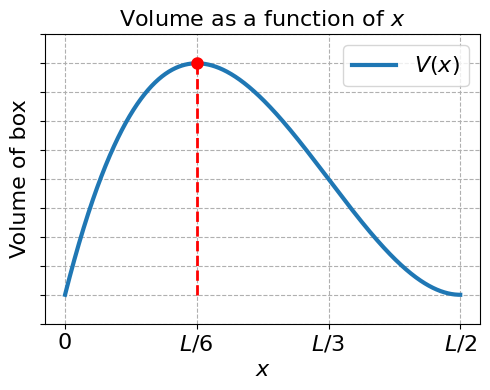

In [2]:
L = 30
x = np.linspace(0, L / 2, num=2 ** 10)
V = lambda x, L: (L - 2 * x) ** 2 * x

fig = plt.figure(figsize=(5, 4))
plt.title("Volume as a function of $x$", fontsize=FONTSIZE)

plt.plot(x, V(x, L), label="$V(x)$", lw=3)
plt.scatter(L / 6, V(L / 6, L), lw=3, color="red", zorder=15)
plt.plot([L / 6, L / 6], [0, V(L / 6, L)], "--", lw=2, color="red", zorder=15)

plt.legend(loc="best", fontsize=FONTSIZE)
plt.xlabel("$x$", fontsize=FONTSIZE)
plt.ylabel("Volume of box", fontsize=FONTSIZE)

plt.xticks(
    [0, L / 6, 2 * L / 6, L / 2], ["0", "$L/6$", "$L/3$", "$L/2$"], fontsize=FONTSIZE
)

arr, labels = plt.yticks()
plt.yticks(arr, ["" for i in arr])

plt.grid(True, zorder=-15, ls="--")
plt.tight_layout()
#plt.savefig("paper_box_volume.pdf")
plt.show()

## (2) The advertisement problem [least squares]

> A company wants equal exposure to 4 sub-populations. Given 2 advertisement channels and their associated reach units $\text{views} / \text{dollar}$, spend the money.

x= [1.5 0.4]
Ax= [ 8.23222749  7.15036622 11.73373546  7.27832831]
resdial Ax - b =  [-0.7 -1.8  2.8 -1.7]


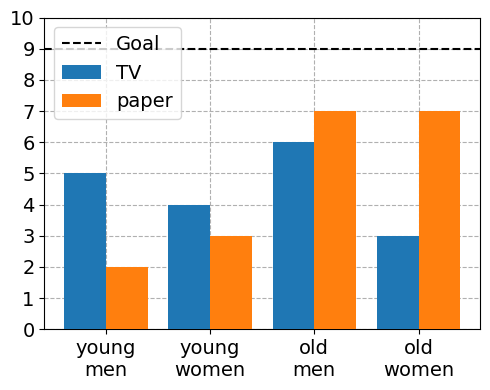

In [6]:
A = np.array([[5, 4, 6, 3], [2, 3, 7, 7]]).T
b = np.array([9, 9, 9, 9])

x, res, *_ = np.linalg.lstsq(A, b, rcond=None)

# Best coverage
print("x=", x.round(1))
print("Ax=", np.dot(A, x))
print("resdial Ax - b = ", (np.dot(A, np.array([1.5, 0.4])) - b).round(1))

fig = plt.figure(figsize=(5, 4))
width = 0.4
ind = np.arange(4)
p1 = plt.bar(ind - 0.2, A[:, 0], width, label="TV", zorder=15)
p2 = plt.bar(ind + 0.2, A[:, 1], width, label="paper", zorder=15)

plt.axhline(y=9, color="black", ls="--", label="Goal")

plt.legend(loc="upper left", fontsize=14)

plt.xticks(ind, ["young\nmen", "young\nwomen", "old\nmen", "old\nwomen"], fontsize=14)
plt.yticks(np.arange(11), np.arange(11), fontsize=14)
plt.grid(True, zorder=-15, ls="--")
plt.tight_layout()
#plt.savefig("advertisement_statement.pdf")
plt.show()

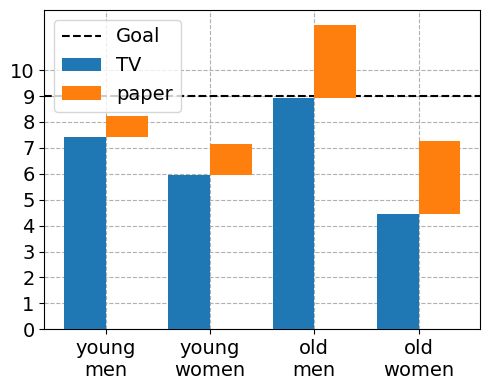

In [7]:
fig = plt.figure(figsize=(5, 4))
width = 0.4
ind = np.arange(4)
p1 = plt.bar(ind - 0.2, A[:, 0] * x[0], width, label="TV", zorder=15)
p2 = plt.bar(
    ind + 0.2, A[:, 1] * x[1], width, bottom=A[:, 0] * x[0], label="paper", zorder=15
)

plt.axhline(y=9, color="black", ls="--", label="Goal")

plt.legend(loc="upper left", fontsize=14)

plt.xticks(ind, ["young\nmen", "young\nwomen", "old\nmen", "old\nwomen"], fontsize=14)
plt.yticks(np.arange(11), np.arange(11), fontsize=14)
plt.grid(True, zorder=-15, ls="--")
plt.tight_layout()
#plt.savefig("advertisement_statement_sol.pdf")
plt.show()

## (3) The *constrained* advertisement problem [constrained least squares]

> Same as before, but constrained by a budget of $1$ unit of money.

In [5]:
A = np.array([[5, 4, 6, 3], [2, 3, 7, 7]]).T
b = np.array([9, 9, 9, 9])

total_cost = 1
const = np.ones((2, 1)).T

KKT_A = np.block([
    [2 * np.dot(A.T, A), const.T], 
    [const, np.array([[0]])]
    ])

KKT_b = np.block([2 * np.dot(A.T, b), np.array([[total_cost]])]).ravel()

x = np.linalg.solve(KKT_A, KKT_b)

# Best coverage
assert abs(x[0] + x[1] - total_cost) < 10e-5

# Best coverage
print("x=", x[:2].round(1))
print("Ax=", np.dot(A, x[:2]))
print("resdial Ax - b = ", (np.dot(A, x[:2]) - b).round(1))

x= [0.6 0.4]
Ax= [3.88888889 3.62962963 6.37037037 4.48148148]
resdial Ax - b =  [-5.1 -5.4 -2.6 -4.5]


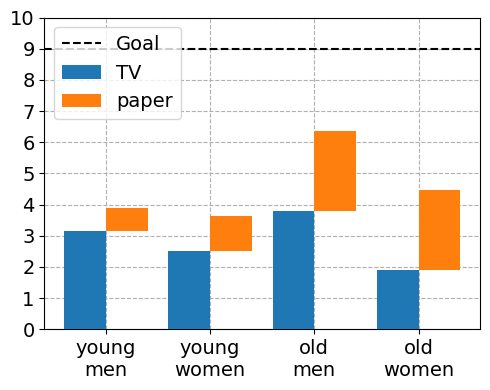

In [9]:
fig = plt.figure(figsize=(5, 4))
width = 0.4
ind = np.arange(4)
p1 = plt.bar(ind - 0.2, A[:, 0] * x[0], width, label="TV", zorder=15)
p2 = plt.bar(
    ind + 0.2, A[:, 1] * x[1], width, bottom=A[:, 0] * x[0], label="paper", zorder=15
)

plt.axhline(y=9, color="black", ls="--", label="Goal")

plt.legend(loc="upper left", fontsize=14)

plt.xticks(ind, ["young\nmen", "young\nwomen", "old\nmen", "old\nwomen"], fontsize=14)
plt.yticks(np.arange(11), np.arange(11), fontsize=14)
plt.grid(True, zorder=-15, ls="--")
plt.tight_layout()
#plt.savefig("advertisement_statement_constr_sol.pdf")
plt.show()

## (4) The worker-assigment problem [assignment problem]

> Assign 4 workers to 4 tasks, given a matrix $C$ specifying to which degree workers enjoy each task.

In [6]:
from scipy.optimize import linear_sum_assignment

n = 4
A = np.array([[5, 6, 1, 6],
              [4, 5, 0, 1],
              [1, 2, 6, 8],
              [7, 2, 1, 1]])

row_ind, col_ind = linear_sum_assignment(-A)
print(row_ind, col_ind)
print(A[row_ind, col_ind].sum())

[0 1 2 3] [3 1 2 0]
24


## (5) The hotel problem [dynamic programming]

> We wish to travel $100$ units of distance. There are many hotels along the way. Pick hotels to travel $\approx 10$ units per day.

24
21
18
15
12
8
6
3
0


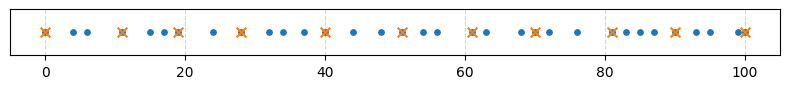

In [12]:
import itertools
import random

COLORS = plt.rcParams["axes.prop_cycle"].by_key()["color"]


def solve_naively(a, M):
    """
    naive solver, in 2**len(a) time. used to check correctness of DP algorithm.
    """
    min_solution = float("inf")
    best_sol = None

    for comb in itertools.product([0, 1], repeat=len(a) - 2):

        # Create a possible soltuion
        chosen = [a[0]]
        for i, c in enumerate(comb):
            if c == 1:
                chosen.append(a[i + 1])
        chosen.append(a[-1])

        # Compute the penalty
        result = np.array(chosen)
        diffs = result[1:] - result[:-1]
        penalty = M - diffs
        error = np.sum(penalty ** 2)

        # Update if better
        if error < min_solution:
            min_solution = error
            best_sol = chosen

    return min_solution, best_sol


def solve_DP(a, M):
    """
    solve hotel problem using DP
    """

    min_penalty = [0 for i in a]
    previous = [0 for i in a]
    for n in range(1, len(a)):

        min_args = [min_penalty[j] + (M - (a[n] - a[j])) ** 2 for j in range(0, n)]

        previous[n] = min_args.index(min(min_args))
        min_penalty[n] = min(min_args)

    return min_penalty, previous


def recreate_path(a, previous):
    """
    recreate the path for the DP solution obtained via `solve_DP`
    """
    solution = [a[-1]]
    current = previous[-1]
    while current != 0:
        solution.insert(0, a[current])
        current = previous[current]
        print(current)

    return [a[0]] + solution


random.seed(123)

# Create a problem
M = 10

diffs = [random.randint(2, 5) for i in range(100)]
a = np.cumsum(np.array(diffs))
a = a - a[0]
a = [i for i in a if i < 100]
a.append(100)

# ans_naive, _ = solve_naively(a, M)
ans_dp, previous = solve_DP(a, M)
# assert ans_naive == ans_dp[-1]

# Create the plot
plt.figure(figsize=(8, 1))
best_path = recreate_path(a, previous)
plt.yticks([])
plt.xticks(np.linspace(0, 100, num=6))
plt.scatter(np.array(a), np.zeros_like(a), zorder=15, s=15)
plt.scatter(
    np.array(best_path),
    np.zeros_like(best_path),
    zorder=25,
    color=COLORS[1],
    s=50,
    marker="x",
)
plt.grid(True, ls="--", zorder=-15, alpha=0.5)
plt.tight_layout()
# plt.savefig('hotel_problem_instance_large_solution.pdf')
plt.show()


## (6) The magnet problem [simulated annealing]

> We are given $6$ magnets. Choose $x_i \in \{-1, 1\}$ to minimize the total energy

$$E(\mathbf{x}) = w_{12} x_1 x_2 + w_{13} x_1 x_3 + \cdots + w_{56} x_5 x_6.$$

In [13]:
import collections

num_magnets = 2 ** 8

print("Number of states:", num_magnets / 2)


def propse_new_state(x, W, energy):
    """Propose a new state by altering one entry."""

    random_node = np.random.randint(len(x))
    random_node = np.random.choice(
        a=len(x), size=np.random.randint(1, 5), replace=False
    )
    x_new = x.copy()
    x_new[random_node] = -x_new[random_node]
    # energy_diff = 2 * x[random_node] * ((W[random_node, :] * x).sum())
    energy_diff = 0.5 * ((x.T @ W @ x) - (x_new.T @ W @ x_new))
    # assert abs(energy_diff - diff2) < 10e-6
    return x_new, W, energy - energy_diff


def init_problem(random_state):
    """Initialize a new problem."""
    np.random.seed(random_state)
    x = np.random.randint(0, 2, num_magnets) * 2 - 1
    W = np.random.randn(num_magnets, num_magnets)
    W = W.T @ W
    W = W - np.diag(np.diag(W))
    assert np.allclose(W, W.T, atol=10e-10)
    energy = x.T @ W @ x

    return x, W, energy

Number of states: 128.0


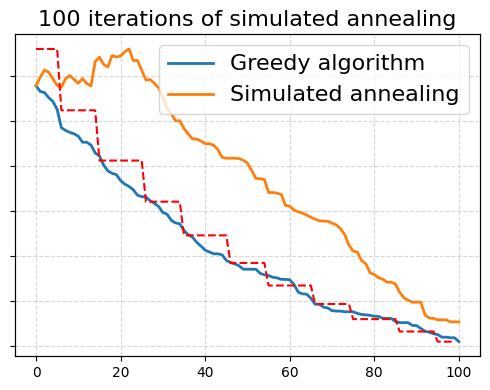

In [14]:
num_iters = 100
algo_runs = 5

# Greedy algorithm
data = collections.defaultdict(list)

for algo_run in range(algo_runs):
    x, W, energy = init_problem(algo_run)
    data[0].append(energy)
    for i in range(1, num_iters + 1):
        new_x, W, new_energy = propse_new_state(x, W, energy)
        if new_energy < energy:
            x = new_x
            energy = new_energy
        data[i].append(energy)

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(
    list(data.keys()),
    [np.mean(v) for v in data.values()],
    label="Greedy algorithm",
    lw=2,
)


# Simulated annealing
data = collections.defaultdict(list)

for algo_run in range(algo_runs):
    x, W, energy = init_problem(algo_run)
    data[0].append(energy)
    for i in range(1, num_iters + 1):
        new_x, W, new_energy = propse_new_state(x, W, energy)

        # If new solution is worse, accept sometimes
        if new_energy >= energy:
            k = 0.02
            if np.random.rand() < np.exp(-round(i / 10) * i * k):
                x = new_x
                energy = new_energy

        # If new solution is better, always accept
        else:
            x = new_x
            energy = new_energy

        data[i].append(energy)

ax.plot(
    list(data.keys()),
    [np.mean(v) for v in data.values()],
    label="Simulated annealing",
    lw=2,
)
ax.grid(True, zorder=-15, ls="--", alpha=0.5)
ax.legend(fontsize=FONTSIZE)
ax.axes.get_yaxis().set_ticklabels([])

ax = ax.twinx()

ax.plot(
    np.arange(num_iters),
    np.exp(-np.round((np.arange(num_iters) / 10)) * 10 * k),
    "--",
    color="red",
)
ax.set_yticks([])
plt.title("100 iterations of simulated annealing", fontsize=FONTSIZE)
plt.tight_layout()
# plt.savefig('simulated_annealing.pdf')
plt.show()


## (7) The egg boiling problem [Bayesian Optimization]

> Let $b$ be the boiling time of an egg, $c$ be the cooling time, and $s$ be the amount of salt used. Maximize the quality of the egg.

In [19]:
def black_box_function(x, y):
    z = 0.9*np.exp(-((x - 0.5) / 0.5)**2 - ((y - 0.5) / 0.5)**2)
    z = z + np.exp(-((x + 0.2) / 0.5)**2 - ((y + 0.2) / 0.5)**2) #1/ (1 + (y + 0.3)**2 + (x + 0.3)**2)
    z = z + np.log1p(x*y*x*y)
    return z

In [21]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {"x": (-1, 1), "y": (-1, 1)}

optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    verbose=2,  # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=42,
)

optimizer.maximize(init_points=5, n_iter=20)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 1         | 0.1071    | -0.2509   | 0.9014    |
| 2         | 0.7202    | 0.464     | 0.1973    |
| 3         | 0.351     | -0.688    | -0.688    |
| 4         | 0.355     | -0.8838   | 0.7324    |
| 5         | 0.7355    | 0.2022    | 0.4161    |
| 6         | 0.7819    | 0.0806    | 0.01099   |
| 7         | 0.1856    | 0.4561    | -0.528    |
| 8         | 0.8816    | 0.7147    | 0.6494    |
| 9         | 0.8745    | 0.7302    | 0.6298    |
| 10        | 0.8106    | 0.9916    | 0.9997    |
| 11        | 0.5971    | 0.5566    | 1.0       |
| 12        | 0.6854    | -0.4121   | 0.03352   |
| 13        | 0.06673   | -1.0      | -0.007312 |
| 14        | 0.1864    | 1.0       | 0.09962   |
| 15        | 0.974     | -0.1884   | -0.2999   |
| 16        | 0.2144    | 0.2081    | -0.6966   |
| 17        | 0.6934    | 1.0       | -1.0      |
| 18        | 1.004     | -0.1743   | -0.1195   |


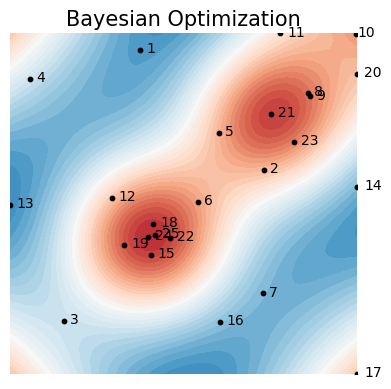

In [22]:
# -------------------------
# Plot the function
# -------------------------
N = 32
n = 2 ** 7
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)
x, y = np.meshgrid(x, y)
z = black_box_function(x, y)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Bayesian Optimization", fontsize=15)
# ax.contour(x, y, z, N, linewidths=0.8, colors='k')
ax.contourf(x, y, z, N, cmap="RdBu_r", vmin=-0.2, vmax=1.2)
plt.xticks([])
plt.yticks([])

# -------------------------
# Plot points
# -------------------------
# https://github.com/fmfn/BayesianOptimization/blob/master/examples/basic-tour.ipynb

for i, res in enumerate(optimizer.res):
    plt.scatter(res["params"]["x"], res["params"]["y"], color="k", s=10)
    plt.text(
        res["params"]["x"] + 0.03 + 0.03 * len(str(i)),
        res["params"]["y"] + 0.01,
        str(i + 1),
        size=10,
        rotation=0.0,
        ha="center",
        va="center",
    )

ax.axis("off")
plt.tight_layout()
#plt.savefig("bayes_opt.pdf")
plt.show()